# Derivatives and Loss Functions | المشتقات ودوال الخسارة

## 📚 Learning Objectives

By completing this notebook, you will:
- Understand the key concepts of this topic
- Apply the topic using Python code examples
- Practice with small, realistic datasets or scenarios

## 🔗 Prerequisites

- ✅ Basic Python
- ✅ Basic NumPy/Pandas (when applicable)

---

## Official Structure Reference

This notebook supports **Course ??, Unit ??** requirements from `DETAILED_UNIT_DESCRIPTIONS.md`.

---


# Derivatives and Loss Functions | المشتقات ودوال الخسارة

## 📚 Prerequisites (What You Need First) | المتطلبات الأساسية

**BEFORE starting this notebook**, you should have completed:
- ✅ **Module 01: Linear Algebra** - Understand vectors and matrices
- ✅ **Example 1: Vectors and Matrices** - Understand data representation
- ✅ **Basic calculus**: Understanding of slopes and rates of change

**If you haven't completed these**, you might struggle with:
- Understanding why derivatives matter
- Understanding gradient computation
- Using derivatives for optimization

---

## 🔗 Where This Notebook Fits | مكان هذا الدفتر

**This is the FIRST example of Module 02** - foundation for all optimization!

**Why this example FIRST?**
- **Before** you can compute gradients, you need to understand derivatives
- **Before** you can optimize models, you need to understand loss functions
- **Before** you can train neural networks, you need gradient descent

**Builds on**: Module 01 (vectors and matrices)

**Leads to**: 
- 📓 Example 2: Gradients (needs derivative understanding)
- 📓 Example 3: Gradient Descent (needs gradient understanding)
- 📓 Module 03: Optimization (uses gradients from this module)

---

## The Story: Understanding Before Using | القصة: الفهم قبل الاستخدام

Imagine you're hiking and want to find the lowest point. **Before** you can find it, you need to know which direction is downhill. **After** understanding derivatives, you know the direction of steepest descent - exactly what gradient descent uses!

Same with machine learning: **Before** training models, we need to know which direction to adjust parameters. **After** understanding derivatives, we can minimize loss functions and train models!

---

## Why This Concept Matters | لماذا يهم هذا المفهوم؟

### Why Derivatives Matter in ML

**WHY** are derivatives essential for machine learning?

1. **Finding Minimum Loss**:
   - **WHY**: ML models are trained by minimizing loss functions
   - **HOW**: Derivatives tell us which direction decreases loss
   - **AFTER**: Enables model training

2. **Optimization Direction**:
   - **WHY**: Need to know which way to adjust parameters
   - **HOW**: Derivative = slope = direction of change
   - **AFTER**: Can optimize efficiently

3. **Neural Network Training**:
   - **WHY**: Backpropagation relies entirely on derivatives
   - **HOW**: Chain rule computes derivatives through layers
   - **AFTER**: Enables deep learning

**Common Student Questions:**
- **Q: What is a derivative?**
  - Answer: Derivative = rate of change (slope) of a function
  - Tells us: How fast function changes at a point
  - Example: Position → derivative = velocity (rate of change of position)
  - In ML: Loss function → derivative = direction to minimize loss
- **Q: Why do we need derivatives in ML?**
  - Answer: ML trains models by minimizing loss → need to know which direction decreases loss
  - Derivative = slope → positive slope = increasing (move left), negative slope = decreasing (move right)
  - Gradient descent uses derivatives to find minimum → train models
  - Without derivatives: Can't optimize → can't train models
- **Q: What's the difference between derivative and gradient?**
  - Answer: Derivative = for 1D functions (one variable), Gradient = for multi-dimensional functions (many variables)
  - Derivative: f(x) → f'(x) = one number (slope)
  - Gradient: f(x,y,z) → ∇f = [∂f/∂x, ∂f/∂y, ∂f/∂z] = vector (direction of steepest increase)
  - In ML: Usually have many parameters → use gradients (not just derivatives)
- **Q: How do derivatives help find minimum?**
  - Answer: Derivative = 0 at minimum/maximum (flat point)
  - Positive derivative → function increasing → move left (decrease x)
  - Negative derivative → function decreasing → move right (increase x)
  - Follow negative derivative → eventually reach minimum
  - This is exactly what gradient descent does!
- **Q: What is the chain rule?**
  - Answer: Chain rule = way to compute derivative of composite functions
  - Formula: (f(g(x)))' = f'(g(x)) * g'(x)
  - Why important: Neural networks = composition of many functions
  - Backpropagation uses chain rule to compute gradients through layers
  - Without chain rule: Can't train deep neural networks!

## Learning Objectives | أهداف التعلم
1. Understand what derivatives represent
2. Compute derivatives of loss functions
3. See how derivatives guide optimization
4. Visualize loss functions and derivatives
5. Understand the connection to gradient descent
6. Apply to real ML scenarios

---

## Step 1: Import necessary libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---

## Part 1: Setting the Scene | الجزء الأول: إعداد المشهد

**BEFORE**: We have loss functions but don't know how to minimize them.

**AFTER**: We'll understand how derivatives guide us to minimize loss!

**Why this matters**: Derivatives are the foundation of all ML optimization!

## Step 2: Understanding Derivatives | الخطوة 2: فهم المشتقات

**BEFORE**: We have a loss function but don't know how to minimize it.

**AFTER**: We'll understand how derivatives tell us the direction to minimize loss!

**Why derivatives?** They tell us the slope - positive slope means increasing (move left), negative slope means decreasing (move right)!

In [2]:
# Example 1: Understanding Derivatives
# WHY: Derivatives tell us which direction to minimize loss
# HOW: Derivative = rate of change = slope

def loss_function(x):
    """A simple loss function: f(x) = x² + 3x + 2"""
    return x**2 + 3*x + 2

def loss_derivative(x):
    """Derivative: f'(x) = 2x + 3"""
    return 2*x + 3

# Evaluate at different points
x_values = [0, 1, 2, 3]
print("Example 1: Understanding Derivatives")
print("=" * 60)
for x in x_values:
    loss = loss_function(x)
    deriv = loss_derivative(x)
    direction = "decreasing (move right)" if deriv < 0 else "increasing (move left)"
    print(f"At x = {x}:")
    print(f"  - Loss: {loss:.2f}")
    print(f"  - Derivative: {deriv:.2f}")
    print(f"  - Function is {direction}")
    print(f"  - 💡 WHY: Derivative tells us direction to minimize!")
    print(f"  - 💡 HOW: Negative derivative → move right, Positive → move left")
    print()

Example 1: Understanding Derivatives
At x = 0:
  - Loss: 2.00
  - Derivative: 3.00
  - Function is increasing (move left)
  - 💡 WHY: Derivative tells us direction to minimize!
  - 💡 HOW: Negative derivative → move right, Positive → move left

At x = 1:
  - Loss: 6.00
  - Derivative: 5.00
  - Function is increasing (move left)
  - 💡 WHY: Derivative tells us direction to minimize!
  - 💡 HOW: Negative derivative → move right, Positive → move left

At x = 2:
  - Loss: 12.00
  - Derivative: 7.00
  - Function is increasing (move left)
  - 💡 WHY: Derivative tells us direction to minimize!
  - 💡 HOW: Negative derivative → move right, Positive → move left

At x = 3:
  - Loss: 20.00
  - Derivative: 9.00
  - Function is increasing (move left)
  - 💡 WHY: Derivative tells us direction to minimize!
  - 💡 HOW: Negative derivative → move right, Positive → move left



## Step 3: Derivatives and Loss Minimization | الخطوة 3: المشتقات وتقليل الخسارة

**BEFORE**: We understand derivatives but don't see how they minimize loss.

**AFTER**: We'll see how derivatives guide us to the minimum of loss functions!

**Why this matters?** This is exactly how ML models learn - by following derivatives to minimize loss!

In [3]:
# Example 2: Using Derivatives to Find Minimum
# WHY: We want to find x that minimizes loss
# HOW: Set derivative to zero (slope = 0 at minimum)

# Find minimum analytically
# f'(x) = 2x + 3 = 0
# x = -3/2 = -1.5

optimal_x = -1.5
optimal_loss = loss_function(optimal_x)

print("Example 2: Finding the Minimum")
print("=" * 60)
print(f"Optimal x (where derivative = 0): {optimal_x}")
print(f"Minimum loss: {optimal_loss:.2f}")
print(f"\n💡 WHY: At minimum, derivative = 0 (no slope)")
print(f"💡 HOW: Solve f'(x) = 0 to find optimal point")
print(f"💡 AFTER: This is the goal of optimization!")

Example 2: Finding the Minimum
Optimal x (where derivative = 0): -1.5
Minimum loss: -0.25

💡 WHY: At minimum, derivative = 0 (no slope)
💡 HOW: Solve f'(x) = 0 to find optimal point
💡 AFTER: This is the goal of optimization!


---

## 📊 Visualization | التصور


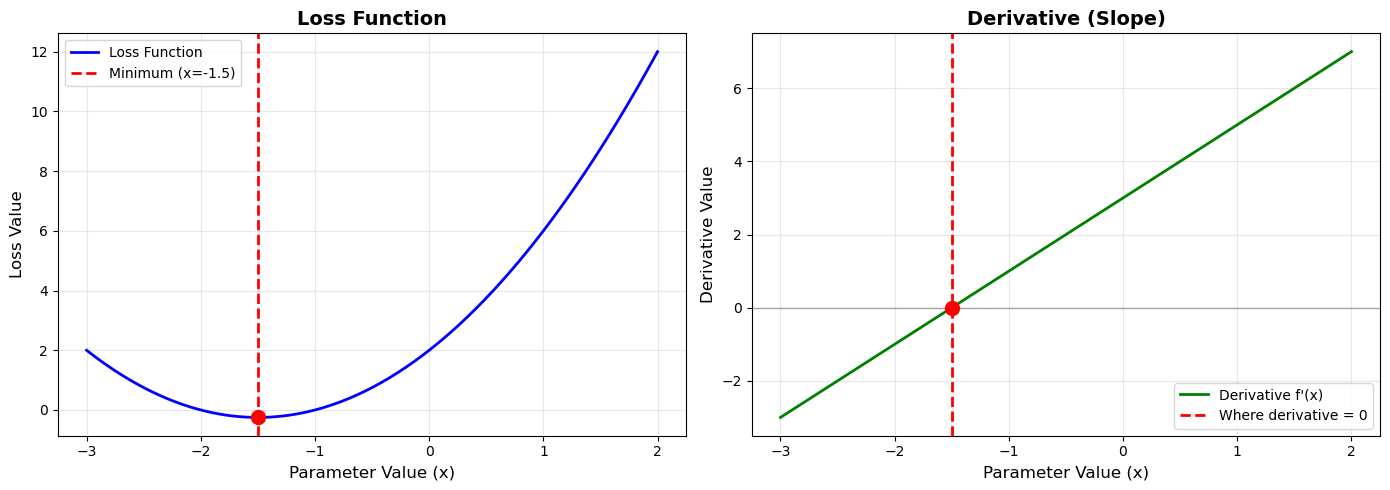


📊 Visualization:
  - Left: Loss function with minimum marked
  - Right: Derivative showing where it equals zero
  - This is HOW derivatives help us find minima!


In [4]:
# Visualize loss function and derivative
x_range = np.linspace(-3, 2, 100)
loss_values = [loss_function(x) for x in x_range]
deriv_values = [loss_derivative(x) for x in x_range]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Loss function
ax1.plot(x_range, loss_values, 'b-', linewidth=2, label='Loss Function')
ax1.axvline(x=-1.5, color='r', linestyle='--', linewidth=2, label='Minimum (x=-1.5)')
ax1.scatter([-1.5], [loss_function(-1.5)], color='red', s=100, zorder=5)
ax1.set_xlabel('Parameter Value (x)', fontsize=12)
ax1.set_ylabel('Loss Value', fontsize=12)
ax1.set_title('Loss Function', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Derivative
ax2.plot(x_range, deriv_values, 'g-', linewidth=2, label="Derivative f'(x)")
ax2.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.3)
ax2.axvline(x=-1.5, color='r', linestyle='--', linewidth=2, label='Where derivative = 0')
ax2.scatter([-1.5], [0], color='red', s=100, zorder=5)
ax2.set_xlabel('Parameter Value (x)', fontsize=12)
ax2.set_ylabel("Derivative Value", fontsize=12)
ax2.set_title('Derivative (Slope)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Visualization:")
print("  - Left: Loss function with minimum marked")
print("  - Right: Derivative showing where it equals zero")
print("  - This is HOW derivatives help us find minima!")

---

## Part 3: AFTER - Results and Implications | الجزء الثالث: بعد - النتائج والآثار

### What This Enables

**AFTER** understanding derivatives:

1. **Model Training**: Can minimize loss functions
2. **Optimization**: Can find optimal parameters
3. **Neural Networks**: Ready to understand backpropagation
4. **Next Steps**: Learn gradients (Example 2) and gradient descent (Example 3)

---

## 🎯 Summary: What We Learned | الملخص: ما تعلمناه

**BEFORE this notebook**: We didn't understand how to minimize loss functions.

**AFTER this notebook**: We can:
- ✅ Understand WHY derivatives matter for ML
- ✅ Compute HOW derivatives work
- ✅ See what happens AFTER (optimization direction)

**Next Steps**: 
- 📓 Example 2: Gradients (extend to multiple variables)
- 📓 Example 3: Gradient Descent (use derivatives for optimization)

---

## ✅ Example Complete! | اكتمل المثال!
